In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate

In [2]:
OF= pd.read_csv('onlinefraud1.csv')
OF.drop('isFlaggedFraud', axis=1, inplace=True)
OF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15161 entries, 0 to 15160
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            15161 non-null  int64  
 1   type            15161 non-null  object 
 2   amount          15161 non-null  float64
 3   nameOrig        15161 non-null  object 
 4   oldbalanceOrg   15161 non-null  float64
 5   newbalanceOrig  15161 non-null  float64
 6   nameDest        15161 non-null  object 
 7   oldbalanceDest  15161 non-null  float64
 8   newbalanceDest  15161 non-null  float64
 9   isFraud         15161 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 1.2+ MB


In [3]:
OF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15161 entries, 0 to 15160
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            15161 non-null  int64  
 1   type            15161 non-null  object 
 2   amount          15161 non-null  float64
 3   nameOrig        15161 non-null  object 
 4   oldbalanceOrg   15161 non-null  float64
 5   newbalanceOrig  15161 non-null  float64
 6   nameDest        15161 non-null  object 
 7   oldbalanceDest  15161 non-null  float64
 8   newbalanceDest  15161 non-null  float64
 9   isFraud         15161 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 1.2+ MB


In [4]:
OF.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1703,1,CASH_IN,521419.58,C962700314,1280338.56,1801758.14,C401424608,1950906.37,1178808.14,0
9328,7,CASH_IN,271415.06,C1639379591,1764851.70,2036266.76,C125722707,1051074.20,779659.14,0
15023,8,PAYMENT,4638.87,C341893682,0.00,0.00,M948522114,0.00,0.00,0
3029,2,CASH_OUT,312856.00,C21331934,58198.26,0.00,C1286084959,1610980.34,1923836.34,0
14124,8,TRANSFER,327456.01,C94475155,0.00,0.00,C875761527,1128518.46,1238942.28,0


In [5]:
OF.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [6]:
fraud_min_max = [['amount', OF.amount.min(), OF.amount.max()],['oldbalanceOrg', OF.oldbalanceOrg.min(), OF.oldbalanceOrg.max()],
                 ['newbalanceOrig', OF.newbalanceOrig.min(), OF.newbalanceOrig.max()],['oldbalanceDest', OF.oldbalanceDest.min(), OF.oldbalanceDest.max()],
                 ['isFraud', OF.isFraud.min(), OF.isFraud.max()]
] 

print(tabulate(fraud_min_max,headers=['columns', 'min value', 'max value'],showindex=True,tablefmt='github',numalign='right'))

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |        2.39 |       1e+07 |
|  1 | oldbalanceOrg  |           0 |    1.29e+07 |
|  2 | newbalanceOrig |           0 |     1.3e+07 |
|  3 | oldbalanceDest |           0 |    2.09e+07 |
|  4 | isFraud        |           0 |           1 |


In [7]:
for col in OF.columns:
    if OF[col].dtype == 'float64':
        OF[col] = pd.to_numeric(OF[col], downcast='float')
    if OF[col].dtype == 'int64':
        OF[col] = pd.to_numeric(OF[col], downcast='unsigned')

OF['type'] = OF['type'].astype('category')

In [8]:
OF.duplicated().sum()

0

In [9]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

In [10]:
OF.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,15161.000000,1.516100e+04,1.516100e+04,1.516100e+04,1.516100e+04,1.516100e+04,15161.000000
mean,5.215751,1.144089e+05,7.502001e+05,7.658401e+05,8.274285e+05,1.153878e+06,0.005211
std,2.489679,2.833777e+05,1.962980e+06,2.005288e+06,2.510987e+06,3.160092e+06,0.072000
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.000000,4.696680e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,7.000000,1.313644e+04,2.012900e+04,7.261870e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.246463e+05,1.254440e+05,1.187286e+05,2.550890e+05,2.852642e+05,0.000000
max,8.000000,1.000000e+07,1.290000e+07,1.300000e+07,2.090000e+07,2.530000e+07,1.000000


In [11]:
OF['step'].value_counts()

7    6837
1    2708
6    1660
8    1160
2    1014
5     665
4     565
3     552
Name: step, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


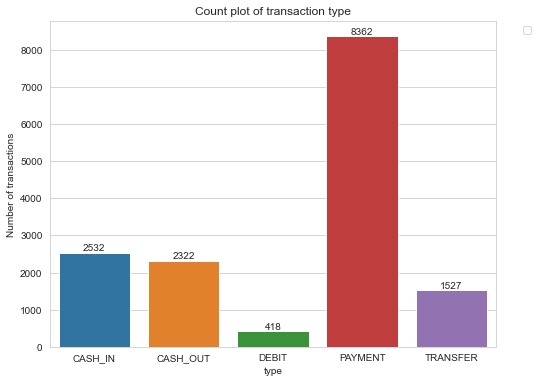

In [12]:
ax = sns.countplot(data=OF, x='type')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

del ax
           

Text(0.5, 1.0, 'Distribution of transaction amount')

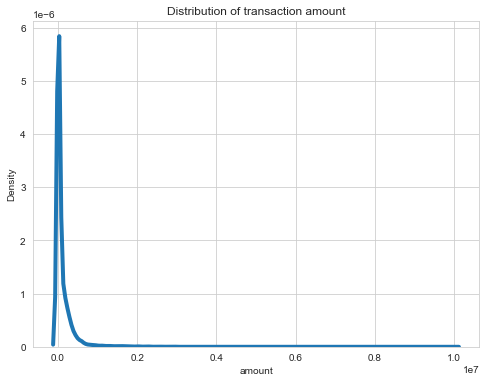

In [13]:
sns.kdeplot(OF['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

In [14]:
OF['nameOrig'].value_counts()

C1231006815    1
C1532850496    1
C1969606205    1
C262986467     1
C257653523     1
              ..
C2075454833    1
C1451450159    1
C477239455     1
C1485318803    1
C1182192724    1
Name: nameOrig, Length: 15161, dtype: int64

Text(0.5, 1.0, 'Distribution of transaction amount')

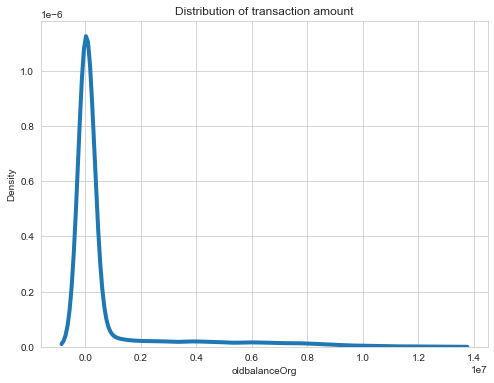

In [15]:
sns.kdeplot(OF['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

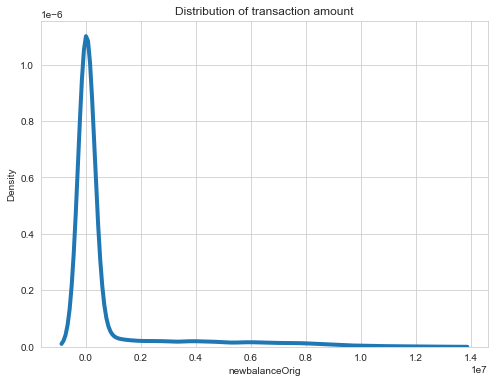

In [16]:
sns.kdeplot(OF['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

In [17]:
OF['nameDest'].value_counts()

C985934102     65
C1286084959    55
C1590550415    54
C2083562754    48
C977993101     48
               ..
M293583290      1
M1105700164     1
M1463316683     1
M658107584      1
M1493762588     1
Name: nameDest, Length: 10129, dtype: int64

Text(0.5, 1.0, 'Distribution of transaction amount')

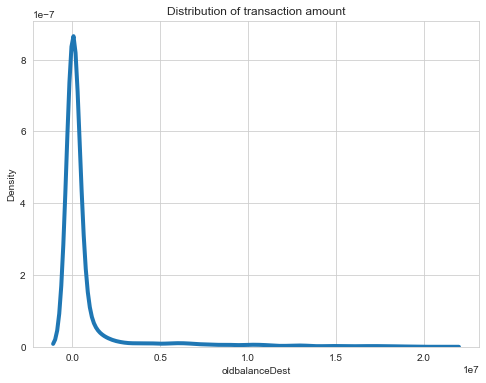

In [18]:
sns.kdeplot(OF['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

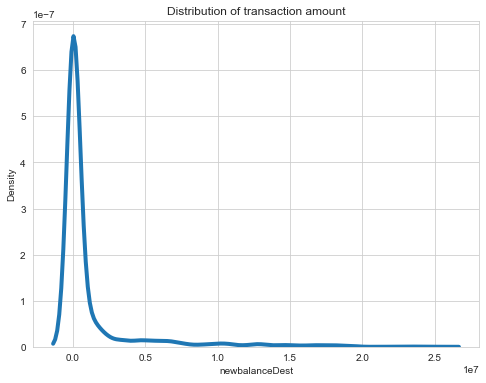

In [19]:
sns.kdeplot(OF['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

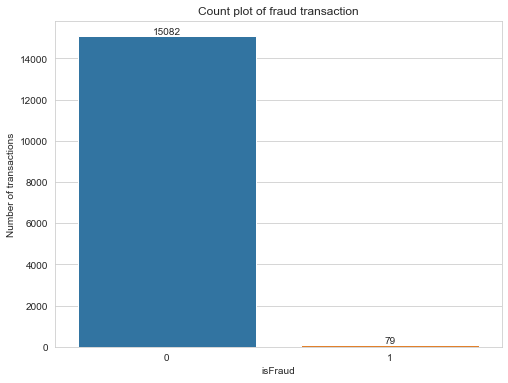

In [20]:
ax = sns.countplot(data=OF, x='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction', fontsize=12)
plt.ylabel('Number of transactions')

del ax

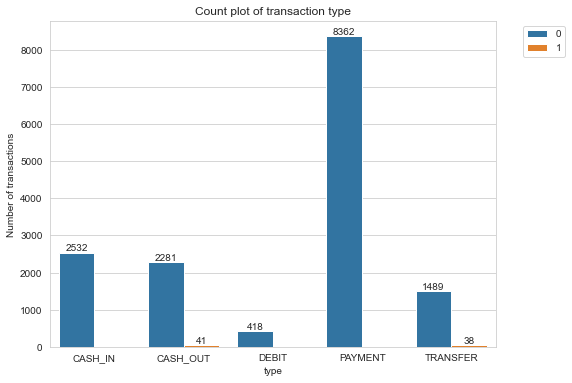

In [21]:
ax = sns.countplot(x='type', data=OF, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

del ax

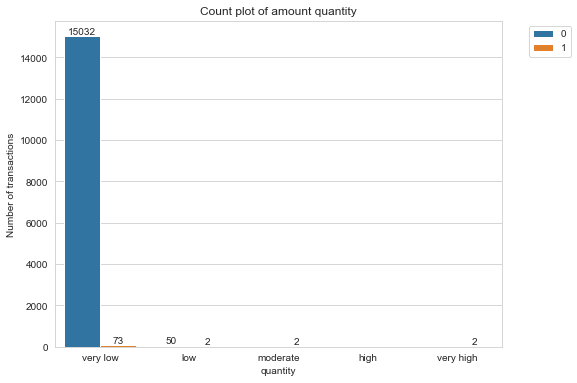

In [22]:
OF['quantity'] = pd.cut(OF['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=OF, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

del ax

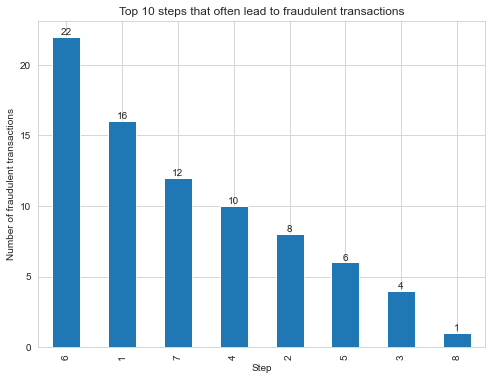

In [23]:
OF1 = OF[OF['isFraud']==1]
OF2 = OF1['step'].value_counts().head(10)
ax = OF2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')

del ax

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

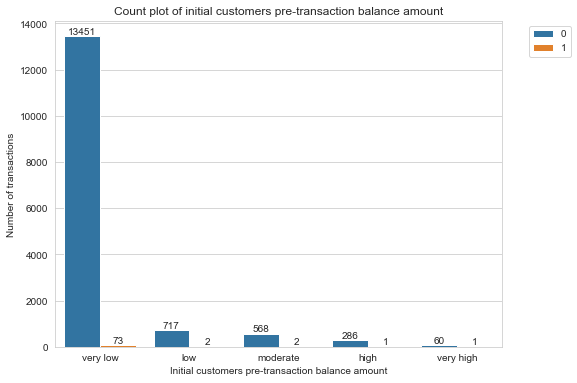

In [24]:
OF['oldbalanceOrg_amt'] = pd.cut(OF['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=OF, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

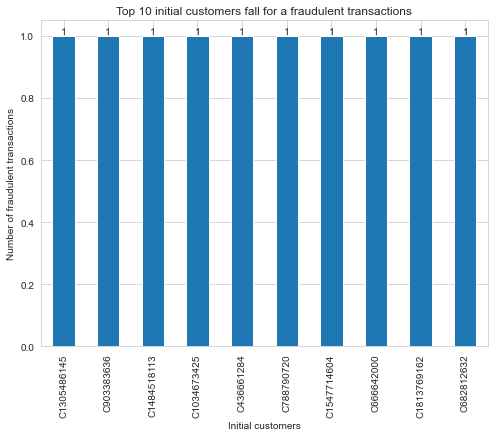

In [25]:
OF2 = OF1['nameOrig'].value_counts().head(10)
ax = OF2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')

del ax,OF2

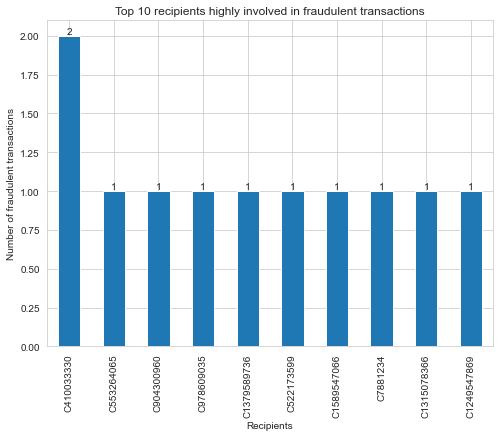

In [26]:
OF2 = OF1['nameDest'].value_counts().head(10)
ax = OF2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions', fontsize=12)
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')

del ax,OF2

Text(0.5, 0, 'Recipient pre-transaction balance amount')

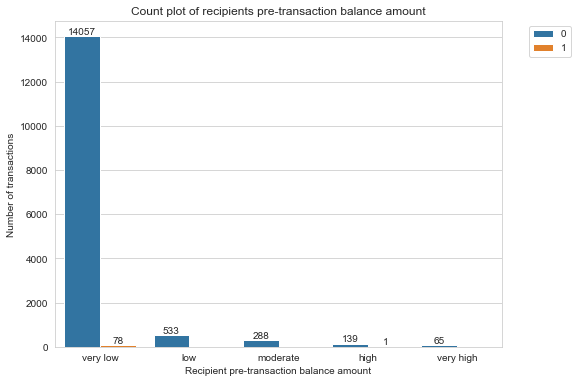

In [27]:
OF['oldbalanceDest_amt'] = pd.cut(OF['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=OF, hue='isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount', fontsize=12)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

Text(0.5, 1.0, 'Correlation')

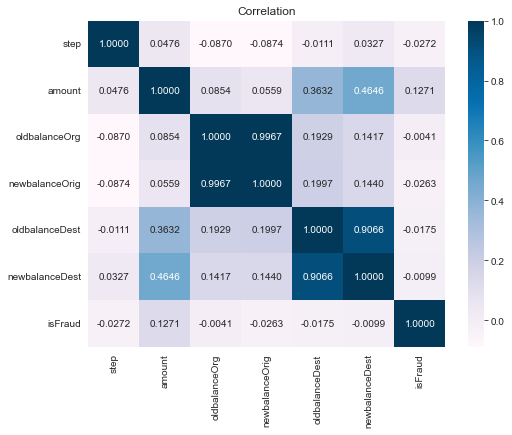

In [28]:
sns.heatmap(OF.corr(), cbar=True, fmt='.4f', annot=True, cmap=plt.cm.PuBu)
plt.title('Correlation', fontsize=12)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = OF[['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest']]
y = OF[['isFraud']]
y = np.squeeze(y)

X = pd.get_dummies(data=X, prefix='type')

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.70, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [30]:
models = {}

models['Random Forest'] = RandomForestClassifier(n_estimators=10)
models['Naive Bayes'] = GaussianNB()


accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    models[key].fit(X_train, y_train)
    pred = models[key].predict(X_valid)
    
    accuracy[key] = accuracy_score(pred, y_valid)
    precision[key] = precision_score(pred, y_valid)
    recall[key] = recall_score(pred, y_valid)
    f1[key] = f1_score(pred, y_valid)

In [31]:
OF_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])

OF_model['Accuracy'] = accuracy.values()
OF_model['Precision'] = precision.values()
OF_model['Recall'] = recall.values()
OF_model['F1'] = f1.values()

In [32]:
OF_model

,Accuracy,Precision,Recall,F1
Random Forest,0.996043,0.291667,0.875000,0.437500
Naive Bayes,0.783909,0.958333,0.022886,0.044704
